# Draw the Plot of Temporal Variation TE

In [1]:
%pwd

'/Users/lichao/Library/CloudStorage/OneDrive-KyushuUniversity/ESG09_Article/Code'

In [2]:
%cd ..

/Users/lichao/Library/CloudStorage/OneDrive-KyushuUniversity/ESG09_Article


## Import Package

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Load Dataset

In [4]:
Df_Filename = os.path.join("Data", "GallupWB_Ml64var1911k14wave_v1.parquet")

In [5]:
Df = pd.read_parquet(Df_Filename)

In [14]:
Df['wave'] = Df['wave'] + 2005

In [16]:
grouped_mean = Df.groupby('wave')['Cantril_ladder'].mean()

print(grouped_mean)

wave
2009    5.497593
2010    5.580768
2011    5.531289
2012    5.470462
2013    5.386755
2014    5.422284
2015    5.419908
2016    5.417108
2017    5.470226
2018    5.525839
2019    5.498187
2020    5.829659
2021    5.741690
2022    5.587633
Name: Cantril_ladder, dtype: float64


In [17]:
grouped_mean_yo = Df[Df['Age']<40].groupby('wave')['Cantril_ladder'].mean()

print(grouped_mean)

wave
2009    5.497593
2010    5.580768
2011    5.531289
2012    5.470462
2013    5.386755
2014    5.422284
2015    5.419908
2016    5.417108
2017    5.470226
2018    5.525839
2019    5.498187
2020    5.829659
2021    5.741690
2022    5.587633
Name: Cantril_ladder, dtype: float64


In [18]:
grouped_mean_ma = Df[(Df['Age'] > 40)&(Df['Age'] <= 65)].groupby('wave')['Cantril_ladder'].mean()

print(grouped_mean)

wave
2009    5.497593
2010    5.580768
2011    5.531289
2012    5.470462
2013    5.386755
2014    5.422284
2015    5.419908
2016    5.417108
2017    5.470226
2018    5.525839
2019    5.498187
2020    5.829659
2021    5.741690
2022    5.587633
Name: Cantril_ladder, dtype: float64


In [19]:
grouped_mean_el = Df[Df['Age'] > 65].groupby('wave')['Cantril_ladder'].mean()

print(grouped_mean)

wave
2009    5.497593
2010    5.580768
2011    5.531289
2012    5.470462
2013    5.386755
2014    5.422284
2015    5.419908
2016    5.417108
2017    5.470226
2018    5.525839
2019    5.498187
2020    5.829659
2021    5.741690
2022    5.587633
Name: Cantril_ladder, dtype: float64


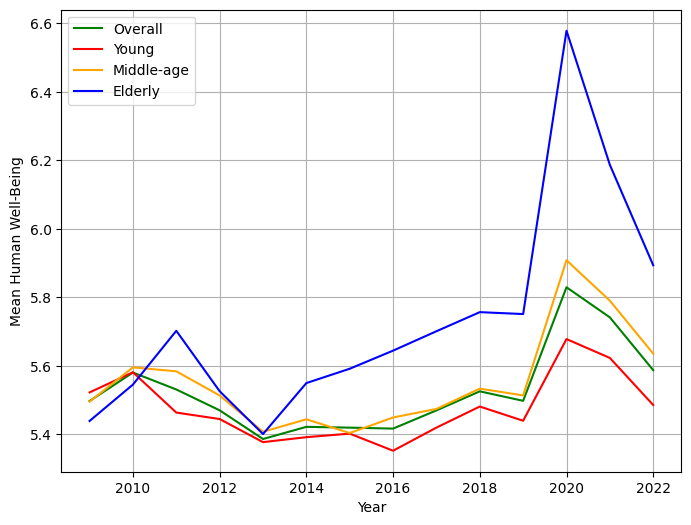

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(list(range(2009, 2023)), grouped_mean, color='g', label='Overall')
plt.plot(list(range(2009, 2023)), grouped_mean_yo, color='r', label='Young')
plt.plot(list(range(2009, 2023)), grouped_mean_ma, color='orange', label='Middle-age')
plt.plot(list(range(2009, 2023)), grouped_mean_el, color='b', label='Elderly')
#plt.title('Temporal Variation of Treatment Effects')
plt.xlabel('Year')
plt.ylabel('Mean Human Well-Being')
plt.grid(True)
plt.legend()
plt.savefig('Figures/MeanValueVariation.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

## Load Wave Dataset and Plot wave

In [32]:
wave_level_df = pd.read_parquet(os.path.join('Results', 'AgeTreatmentWaveDifference_v1.parquet'))

In [33]:
wave_level_df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,4,0.105445,12.812918,1.483522e-37,0.099453,12.098689,1.131418e-33,-0.005992,-0.736200,4.616107e-01,...,6.210380e-04,-0.089670,-9.986269,1.805493e-23,-0.029248,-1.317821,1.875687e-01,0.077550,4.323240,1.541304e-05
1,5,0.124570,16.111894,2.418400e-58,0.072553,9.400935,5.497205e-21,-0.052017,-6.779161,1.214222e-11,...,3.688977e-03,-0.143577,-12.803339,1.678241e-37,-0.098272,-3.994374,6.492831e-05,0.060313,3.879908,1.046201e-04
2,6,0.119039,17.852676,3.187629e-71,0.042844,6.423253,1.337324e-10,-0.076195,-11.402489,4.164102e-30,...,6.478878e-08,-0.241098,-28.811077,5.050982e-182,-0.312278,-22.778404,1.423657e-114,-0.045439,-3.434298,5.944047e-04
3,7,0.108635,17.039172,4.713618e-65,0.054814,8.607403,7.530183e-18,-0.053821,-8.446120,3.032649e-17,...,8.972626e-01,-0.189895,-24.324912,1.886469e-130,-0.188199,-13.633108,2.754403e-42,0.022140,1.672520,9.442592e-02
4,8,0.096542,12.768583,2.576892e-37,0.021966,2.905936,3.662133e-03,-0.074577,-9.874210,5.479806e-23,...,2.149879e-03,-0.135277,-13.470868,2.494275e-41,-0.088078,-3.635503,2.776064e-04,0.067978,4.381903,1.178508e-05
5,9,0.123555,16.308139,9.745512e-60,0.050165,6.609492,3.869473e-11,-0.073390,-9.622221,6.538754e-22,...,8.450490e-10,-0.187505,-19.164962,9.558303e-82,-0.276086,-17.252180,1.380765e-66,-0.058056,-3.965221,7.340608e-05
6,10,0.116384,15.784133,4.451947e-56,0.029852,3.992662,6.536753e-05,-0.086532,-11.358197,6.950057e-30,...,6.872430e-23,-0.128681,-12.423849,2.038951e-35,-0.271869,-17.437753,5.538447e-68,-0.120945,-8.114614,4.959481e-16
7,11,0.074356,9.948179,2.611989e-23,0.001895,0.251199,8.016606e-01,-0.072461,-9.496802,2.194878e-21,...,3.104141e-37,-0.178261,-17.996379,2.577128e-72,-0.358671,-23.909880,5.930384e-126,-0.149187,-10.350975,4.331312e-25
8,12,0.070593,9.585475,9.331220e-22,-0.016264,-2.192318,2.835803e-02,-0.086858,-11.575051,5.676936e-31,...,5.973844e-35,-0.133651,-14.717380,5.467547e-49,-0.305365,-20.512642,2.633190e-93,-0.130082,-9.184538,4.244656e-20
9,13,0.053513,7.401526,1.353108e-13,-0.029800,-4.079473,4.516060e-05,-0.083312,-11.271422,1.865179e-29,...,9.464461e-31,-0.119461,-14.360716,9.942297e-47,-0.277735,-20.782086,1.031089e-95,-0.135237,-9.658031,4.700163e-22


In [34]:
wave_level_df.loc[:, 0] = wave_level_df.loc[:, 0] + 2005

### Draw Plot: TE

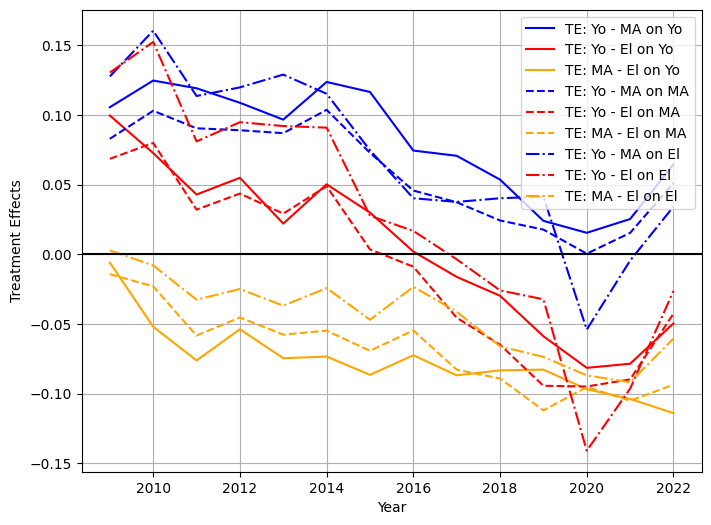

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 1], color='b', label='TE: Yo - MA on Yo')
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 4], color='r', label='TE: Yo - El on Yo')
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 7], color='orange', label='TE: MA - El on Yo')
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 10], color='b', label='TE: Yo - MA on MA', linestyle = '--')
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 13], color='r', label='TE: Yo - El on MA', linestyle = '--')
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 16], color='orange', label='TE: MA - El on MA', linestyle = '--')
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 19], color='b', label='TE: Yo - MA on El', linestyle = '-.')
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 22], color='r', label='TE: Yo - El on El', linestyle = '-.')
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 25], color='orange', label='TE: MA - El on El', linestyle = '-.')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
#plt.title('Temporal Variation of Treatment Effects')
plt.ylabel('Treatment Effects')
plt.xlabel('Year')
plt.grid(True)
plt.legend()
plt.savefig('Figures/TemporalVariationTE.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

### Draw Plot: BHE

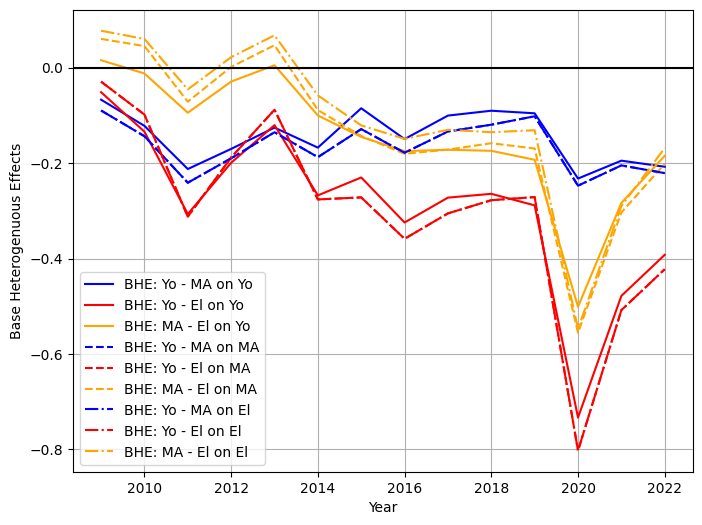

In [42]:
plt.figure(figsize=(8, 6))
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 28], color='b', label='BHE: Yo - MA on Yo')
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 31], color='r', label='BHE: Yo - El on Yo')
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 34], color='orange', label='BHE: MA - El on Yo')
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 37], color='b', label='BHE: Yo - MA on MA', linestyle = '--')
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 40], color='r', label='BHE: Yo - El on MA', linestyle = '--')
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 43], color='orange', label='BHE: MA - El on MA', linestyle = '--')
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 46], color='b', label='BHE: Yo - MA on El', linestyle = '-.')
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 49], color='r', label='BHE: Yo - El on El', linestyle = '-.')
plt.plot(wave_level_df.loc[:, 0], wave_level_df.loc[:, 52], color='orange', label='BHE: MA - El on El', linestyle = '-.')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
#plt.title('Temporal Variation of Treatment Effects')
plt.ylabel('Base Heterogenuous Effects')
plt.xlabel('Year')
plt.grid(True)
plt.legend()
plt.savefig('Figures/BaseHeterogenuousEffectsBHE.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

## Load Country Dataset and Plot Country

In [43]:
country_level_df = pd.read_parquet(os.path.join('Results', 'AgeTreatmentCountryDifference_v1.parquet'))

In [44]:
country_level_df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,AFG,0.025662,1.687721,9.147970e-02,0.207336,14.248716,7.474335e-46,0.181674,12.233902,2.681418e-34,...,2.373694e-01,0.057580,3.477040,5.085879e-04,0.153000,1.933884,5.315371e-02,0.055247,0.761614,4.463473e-01
1,AGO,0.197009,4.082041,4.597171e-05,0.784304,18.647370,5.463429e-73,0.587295,14.018174,4.121836e-43,...,5.537566e-07,0.204797,3.609594,3.153820e-04,1.024209,8.174945,6.602814e-16,0.678882,5.657117,2.615299e-08
2,ALB,0.290364,11.216218,4.877125e-29,0.117822,4.467377,7.997403e-06,-0.172542,-6.520725,7.303218e-11,...,6.004688e-03,0.575586,23.171865,6.118897e-116,0.682953,23.206588,3.598990e-115,0.193217,4.790436,1.697053e-06
3,ARE,0.010958,0.961239,3.364403e-01,-0.363745,-30.692586,1.639688e-203,-0.374704,-30.605371,2.184193e-202,...,1.098547e-03,0.045280,-0.056912,9.546160e-01,-0.302823,-3.002053,2.686334e-03,-0.320370,-2.829112,4.689323e-03
4,ARG,0.264860,15.359671,9.117499e-53,0.284241,15.605742,2.134570e-54,0.019381,1.012453,3.113410e-01,...,1.413851e-01,0.244103,10.447450,1.964086e-25,0.286432,7.214546,5.864074e-13,-0.036586,-1.162161,2.452076e-01
5,ARM,0.265993,11.730649,1.374983e-31,0.276864,11.776804,8.016491e-32,0.010871,0.455849,6.485079e-01,...,1.636166e-23,0.540667,23.530557,2.542884e-119,0.852862,27.925320,1.490857e-163,0.315838,9.432500,5.291475e-21
6,AUS,-0.027478,-1.026735,3.045987e-01,-0.300547,-11.425703,7.730796e-30,-0.273069,-9.929087,5.253296e-23,...,2.515629e-24,0.034638,2.406234,1.614223e-02,-0.184437,-3.530421,4.177368e-04,-0.143904,-6.971986,3.336836e-12
7,AUT,0.054084,3.084836,2.043210e-03,0.001764,0.102865,9.180725e-01,-0.052319,-3.093600,1.983880e-03,...,8.601034e-23,-0.043602,-0.502856,6.150752e-01,0.147040,6.898204,5.738507e-12,0.142847,7.585968,3.610501e-14
8,AZE,0.145185,8.163845,3.598243e-16,0.280672,16.028782,3.549861e-57,0.135486,7.496978,7.031238e-14,...,2.108912e-07,0.256402,10.231486,1.938007e-24,0.546100,10.822667,4.793479e-27,0.288631,5.504415,3.930328e-08
9,BDI,0.000675,0.026088,9.791880e-01,0.080562,3.325959,8.870024e-04,0.079886,3.135362,1.725593e-03,...,2.977296e-02,0.233567,6.642030,3.560306e-11,0.434280,5.404916,7.020150e-08,0.192459,2.468467,1.373350e-02


### Draw Plot: TE

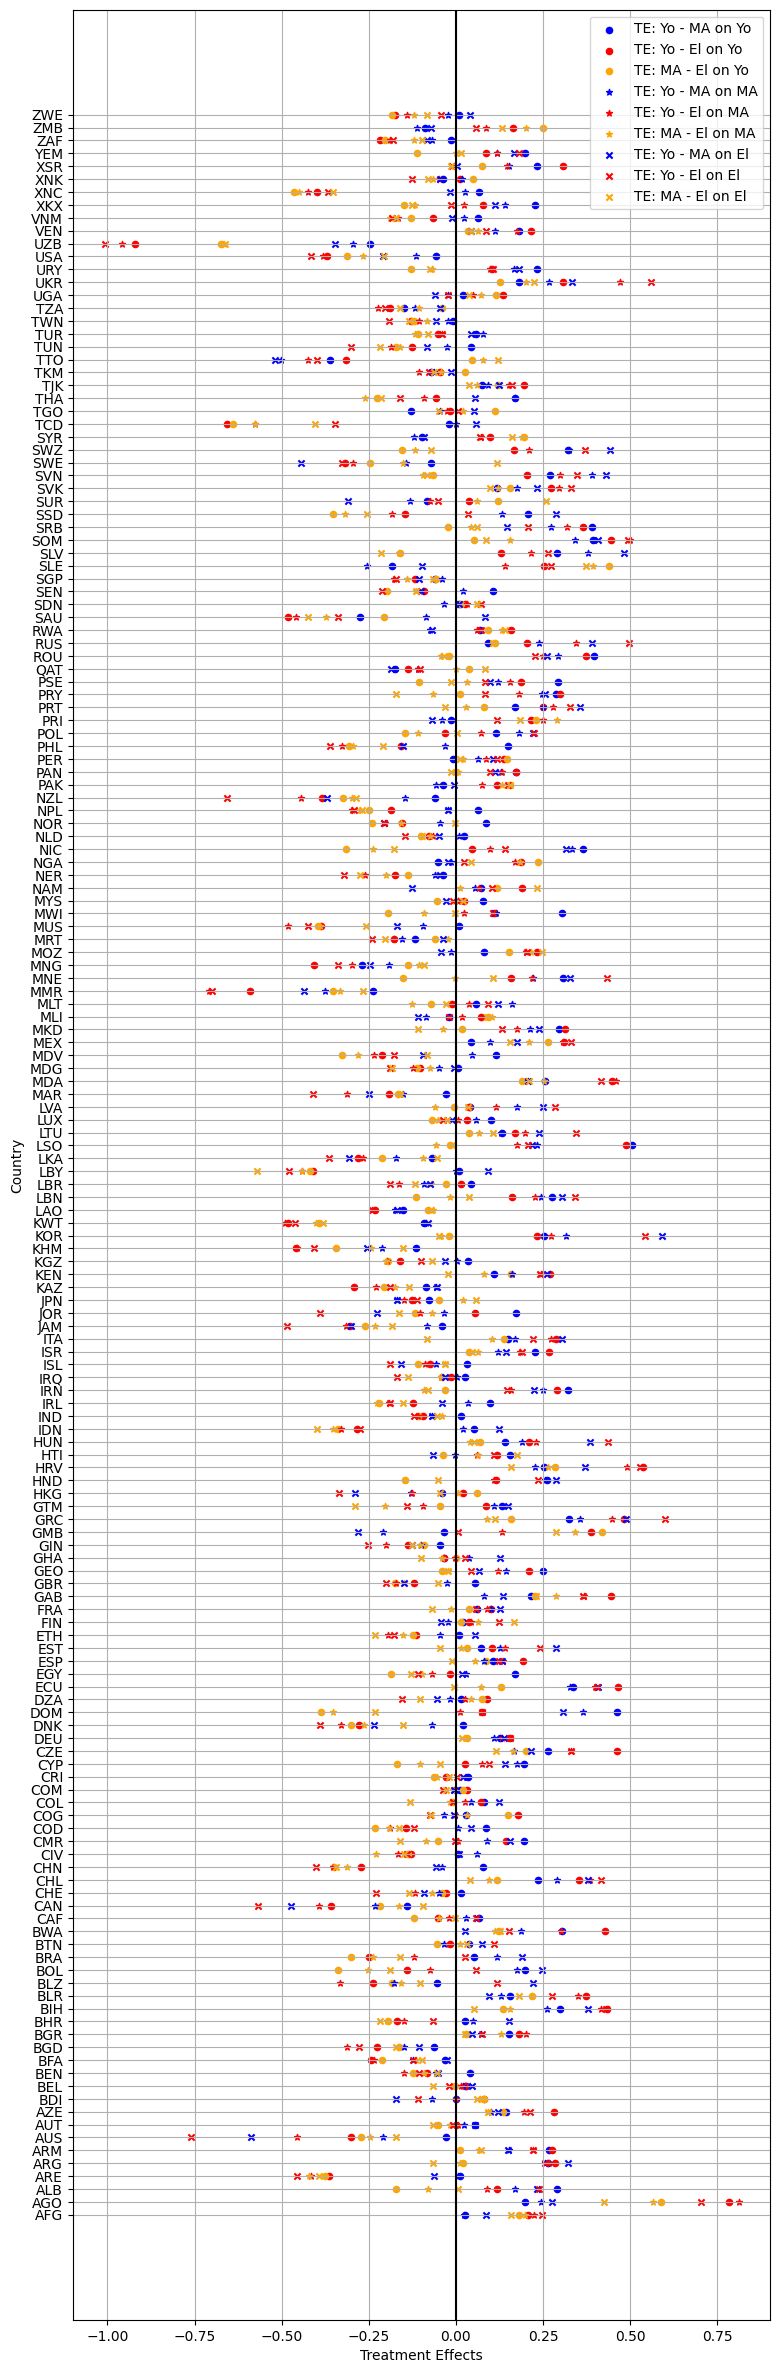

In [63]:
plt.figure(figsize=(9, 30))
plt.scatter(country_level_df.loc[:, 1], country_level_df.loc[:, 0], color='b', label='TE: Yo - MA on Yo', s=20)
plt.scatter(country_level_df.loc[:, 4], country_level_df.loc[:, 0], color='r', label='TE: Yo - El on Yo', s=20)
plt.scatter(country_level_df.loc[:, 7], country_level_df.loc[:, 0], color='orange', label='TE: MA - El on Yo', s=20)
plt.scatter(country_level_df.loc[:, 10], country_level_df.loc[:, 0], color='b', label='TE: Yo - MA on MA', marker = '*', s=20)
plt.scatter(country_level_df.loc[:, 13], country_level_df.loc[:, 0], color='r', label='TE: Yo - El on MA', marker = '*', s=20)
plt.scatter(country_level_df.loc[:, 16], country_level_df.loc[:, 0], color='orange', label='TE: MA - El on MA', marker = '*', s=20)
plt.scatter(country_level_df.loc[:, 19], country_level_df.loc[:, 0], color='b', label='TE: Yo - MA on El', marker = 'x', s=20)
plt.scatter(country_level_df.loc[:, 22], country_level_df.loc[:, 0], color='r', label='TE: Yo - El on El', marker = 'x', s=20)
plt.scatter(country_level_df.loc[:, 25], country_level_df.loc[:, 0], color='orange', label='TE: MA - El on El', marker = 'x', s=20)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1.5)
plt.xlabel('Treatment Effects')
plt.ylabel('Country')
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend()
#plt.savefig('Figures/TemporalVariationTE.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()